In [1]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

# Playground - iris dataset

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
from sklearn.datasets import load_iris

In [4]:
dataset=load_iris()

In [5]:
X=dataset["data"]

In [6]:
feat_names=dataset["feature_names"]

In [7]:
y=dataset["target"]

In [8]:
feat_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
df=pd.DataFrame(X,columns=feat_names)

In [10]:
df["target"]=y

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


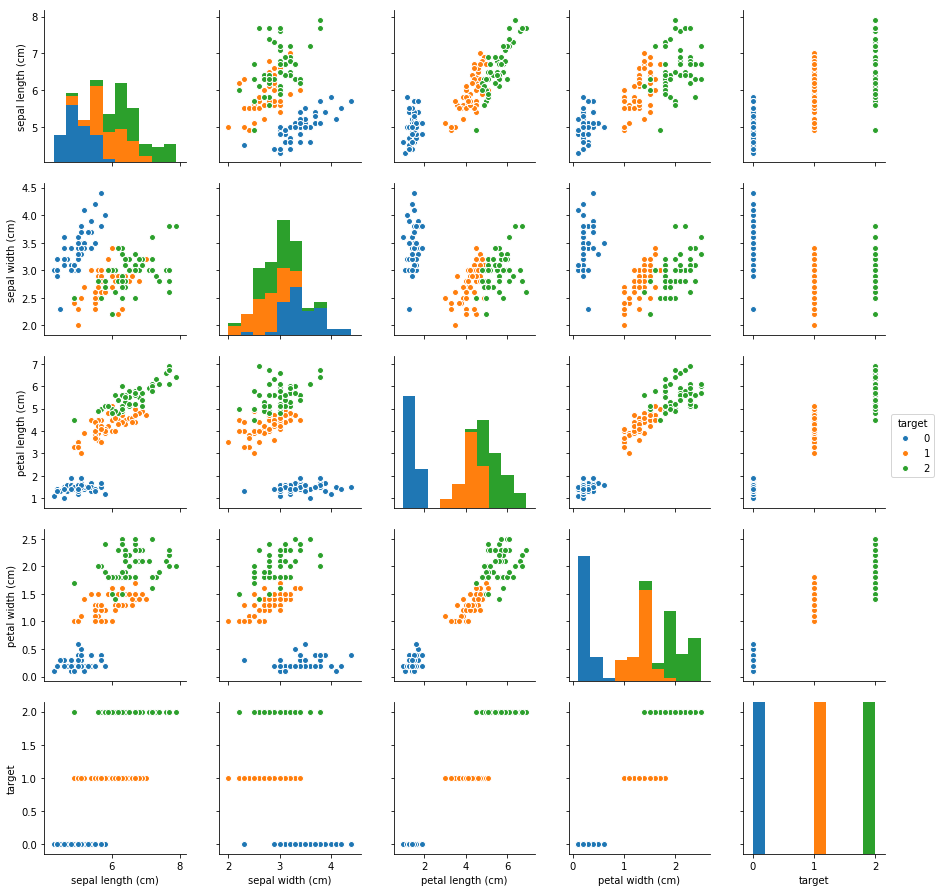

In [12]:
sns.pairplot(df,hue="target")

# Dimensionality reduction

In [13]:
from sklearn.decomposition import PCA, KernelPCA,IncrementalPCA,NMF,TruncatedSVD

In [14]:
from sklearn.manifold import TSNE

In [15]:
def plot_clustering_2D(clustering_algo):
    out=clustering_algo.fit_transform(X)
    plt.scatter(out[:,0],out[:,1], c=y)
    plt.show()

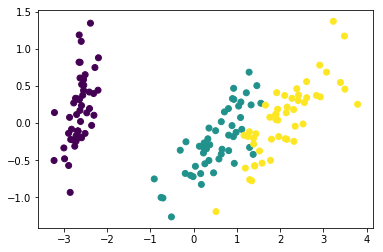

In [16]:
plot_clustering_2D(PCA(n_components=2))

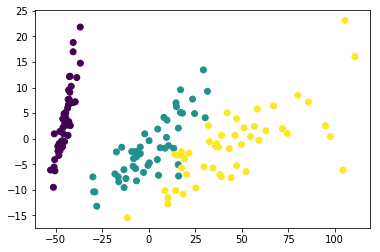

In [17]:
plot_clustering_2D(KernelPCA(n_components=2,kernel="poly",degree=3))

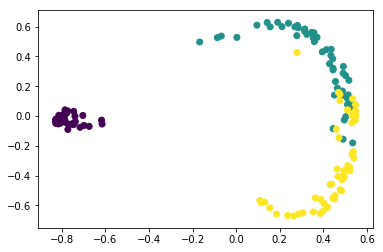

In [18]:
plot_clustering_2D(KernelPCA(n_components=2,kernel="rbf"))

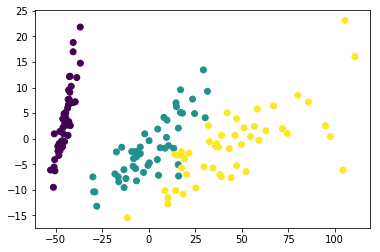

In [19]:
plot_clustering_2D(KernelPCA(n_components=2,kernel="poly"))

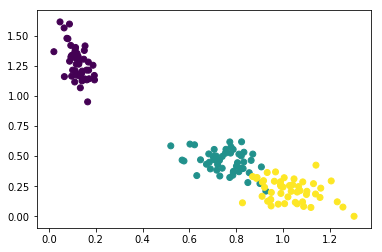

In [20]:
plot_clustering_2D(NMF(n_components=2))

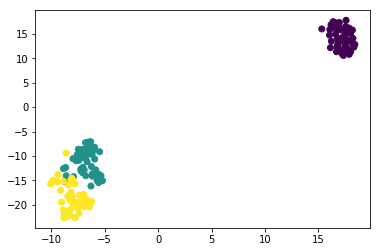

In [21]:
plot_clustering_2D(TSNE(n_components=2,random_state=16))

# Clustering

In [22]:
from sklearn.metrics import homogeneity_score

## KMeans

In [23]:
from sklearn.cluster import KMeans

elbow method for cluster count determination

In [24]:
inertias=[]
scores=[]
n_clusters=list(range(1,10))
for n_cluster in n_clusters:
    kmeans=KMeans(n_clusters=n_cluster)
    y_pred=kmeans.fit_predict(X)
    scores.append(homogeneity_score(y,y_pred))
    inertias.append(kmeans.inertia_)

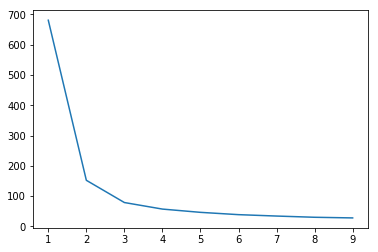

In [25]:
plt.plot(n_clusters,inertias)

we are "cheating" here, because compare it to known answers (target)

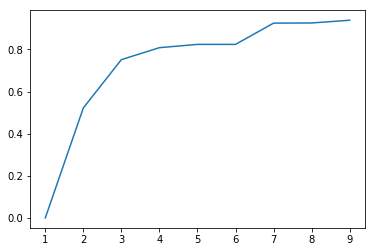

In [26]:
plt.plot(n_clusters,scores)

## Density based algorithm (DBSCAN)

In [27]:
from sklearn.cluster import DBSCAN

In [28]:
db_scores=[]
epss=np.linspace(0.01,1)
for eps in epss:
    dbscan=DBSCAN(eps=eps)
    y_pred=dbscan.fit_predict(X)
    db_scores.append(homogeneity_score(y,y_pred))


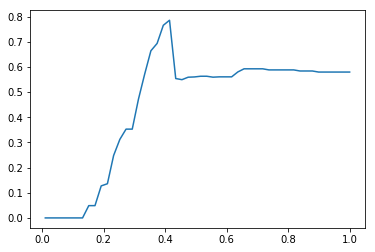

In [29]:
plt.plot(epss,db_scores)

## Gaussian mixture

http://scikit-learn.org/stable/modules/mixture.html

In [30]:
from sklearn.mixture import GaussianMixture

In [31]:
gm_scores=[]
aics=[]
bics=[]
n_clusters=list(range(1,10))
for n_cluster in n_clusters:
    gm = GaussianMixture(n_components=n_cluster,verbose=0)
    gm.fit(X)
    y_pred=gm.predict(X)
    gm_scores.append(homogeneity_score(y,y_pred))
    aics.append(gm.aic(X))
    bics.append(gm.bic(X))

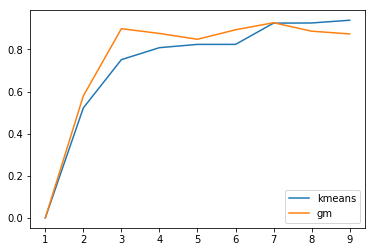

In [32]:
plt.plot(n_clusters,scores,label="kmeans")
plt.plot(n_clusters,gm_scores,label="gm")
plt.legend()

Two information criteria:

AIC - https://en.wikipedia.org/wiki/Akaike_information_criterion

BIC - https://en.wikipedia.org/wiki/Bayesian_information_criterion


Lower values are preferred

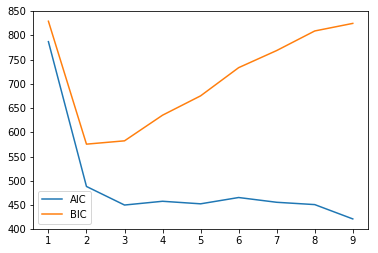

In [33]:
plt.plot(n_clusters,aics,label="AIC")
plt.plot(n_clusters,bics,label="BIC")
plt.legend()

Can be used for selection of number of clusters
http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

In [34]:
gm = GaussianMixture(n_components=3,verbose=0)
gm.fit(X)
y_pred=gm.predict(X)

In [35]:
homogeneity_score(y,y_pred)

0.8983263672602775

visualize the center of Gaussians

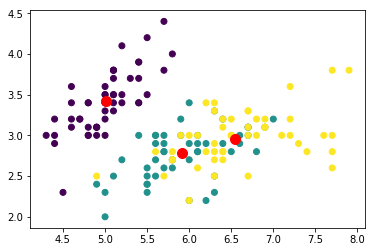

In [36]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(gm.means_[:,0],gm.means_[:,1],marker="o",color="r",s=100)

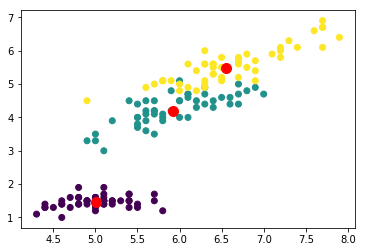

In [37]:
plt.scatter(X[:,0],X[:,2],c=y)
plt.scatter(gm.means_[:,0],gm.means_[:,2],marker="o",color="r",s=100)

# Overview of clustering methods in sklearn

http://scikit-learn.org/stable/modules/clustering.html

TODO: try different clustering algorithm by yourself and compare its homogeneity_score

# Hazardous materials

Description:
This dataset contains reference information for hazardous materials and chemicals. Records:
520 

Top properties:
Ignition temperature
Flammable limits
Flash point

https://citrination.com/datasets/73084/show_search

In [38]:
df=pd.read_csv("hazardous_materials.csv",index_col=None)

In [39]:
df.head()

,ID,Citation,URL,Common name,Data type,Measurement name,Measurement value,Measurement units,Measurement method,Measurement condition name,Measurement condition value,Measurement condition units,Measurement condition name.1,Measurement condition value.1,Measurement condition units.1,Measurement condition name.2,Measurement condition value.2,Measurement condition units.2,Unnamed: 18
0,1,"Mumford, C. J. and P. A. Carson. Hazardous Che...",http://www.amazon.com/Hazardous-Chemicals-Hand...,Acetal,Experimental,Boiling point,103,$^{\circ}$C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Mumford, C. J. and P. A. Carson. Hazardous Che...",http://www.amazon.com/Hazardous-Chemicals-Hand...,NaN,Experimental,Flammable limits,1.6-10.4,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,"Mumford, C. J. and P. A. Carson. Hazardous Che...",http://www.amazon.com/Hazardous-Chemicals-Hand...,NaN,Experimental,Flash point,-21,$^{\circ}$C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,"Mumford, C. J. and P. A. Carson. Hazardous Che...",http://www.amazon.com/Hazardous-Chemicals-Hand...,NaN,Experimental,Ignition temperature,230,$^{\circ}$C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,"Mumford, C. J. and P. A. Carson. Hazardous Che...",http://www.amazon.com/Hazardous-Chemicals-Hand...,NaN,Experimental,Melting point,-100,$^{\circ}$C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df=df.fillna(method="ffill")

In [41]:
df.head()

,ID,Citation,URL,Common name,Data type,Measurement name,Measurement value,Measurement units,Measurement method,Measurement condition name,Measurement condition value,Measurement condition units,Measurement condition name.1,Measurement condition value.1,Measurement condition units.1,Measurement condition name.2,Measurement condition value.2,Measurement condition units.2,Unnamed: 18
0,1,"Mumford, C. J. and P. A. Carson. Hazardous Che...",http://www.amazon.com/Hazardous-Chemicals-Hand...,Acetal,Experimental,Boiling point,103,$^{\circ}$C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Mumford, C. J. and P. A. Carson. Hazardous Che...",http://www.amazon.com/Hazardous-Chemicals-Hand...,Acetal,Experimental,Flammable limits,1.6-10.4,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,"Mumford, C. J. and P. A. Carson. Hazardous Che...",http://www.amazon.com/Hazardous-Chemicals-Hand...,Acetal,Experimental,Flash point,-21,$^{\circ}$C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,"Mumford, C. J. and P. A. Carson. Hazardous Che...",http://www.amazon.com/Hazardous-Chemicals-Hand...,Acetal,Experimental,Ignition temperature,230,$^{\circ}$C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,"Mumford, C. J. and P. A. Carson. Hazardous Che...",http://www.amazon.com/Hazardous-Chemicals-Hand...,Acetal,Experimental,Melting point,-100,$^{\circ}$C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df[["Measurement name","Measurement units"]].drop_duplicates()

,Measurement name,Measurement units
0,Boiling point,$^{\circ}$C
1,Flammable limits,%
2,Flash point,$^{\circ}$C
3,Ignition temperature,$^{\circ}$C
4,Melting point,$^{\circ}$C
5,Solubility in water,g/100 g
6,Specific gravity,g/100 g
7,Vapor density,g/100 g
8,Vapor pressure,mm Hg
14,Solubility in water,$^{\circ}$C


In [43]:
pivot_df = df.pivot_table(values='Measurement value',index="Common name",columns="Measurement name",aggfunc=lambda r:r)
pivot_df

Measurement name,Boiling point,Flammable limits,Flash point,Ignition temperature,Melting point,Solubility in water,Specific gravity,Vapor density,Vapor pressure
Common name,,,,,,,,,
"1,1,1-Trichloroethane",74,None,none,None,-38,insoluble,1.34,4.6,100
"1,1,2-Trichloro-1,2,2-trifluoro ethane",48,None,None,680,-36,insoluble,1.56,None,None
"1,1-Dichloro-1-nitroethane",124,None,76,None,None,0.5,1.42,4.97,None
"1,1-Dichloroethane",57,5.6-11.4,-6,458,-97,0.7,1.18,3.4,None
"1,2,3-Trichloropropane",156,3.2-12.6,82,304,-15,<5,1.39,5,100
"1,2,4,5-Tetrachlorobenzene",243,None,155,None,139,insoluble,1.86,None,<0.1
"1,2,4-Trichlorobenzene",214,None,99,None,17,insoluble,1.45,6.3,1
"1,2-Dichloroethylene",48-60,9.7-12.8,None,None,-80,<5,1.3,3.3,None
"1,2-Dichloropropane",97,3.4-14.5,16,557,-100,<5,1.16,3.9,40


an auxiliary method for convert string "40-60" into average value 50.0

In [44]:
def convert_range(s):
    try:
        splits=s.split("-")
        if len(splits)==2 and np.all(np.array(list(map(len,splits)))>0):
            return np.mean(list(map(float,splits)))
        else:
            return s
    except:
        return s

In [45]:
for col in pivot_df.columns:
    pivot_df[col]=pivot_df[col].str.replace("<","").str.replace(">","")
    pivot_df[col]=pivot_df[col].map(convert_range)
    pivot_df[col] = pd.to_numeric(pivot_df[col],errors="coerce")

In [46]:
pivot_df.shape

(520, 9)

In [47]:
pivot_df.describe()

Measurement name,Boiling point,Flammable limits,Flash point,Ignition temperature,Melting point,Solubility in water,Specific gravity,Vapor density,Vapor pressure
count,518.000000,208.000000,470.000000,310.000000,444.000000,225.000000,508.000000,444.000000,243.000000
mean,144.692471,9.516010,54.074043,381.790323,-36.908784,4019.726551,1.000522,4.029322,118.724078
std,105.096878,12.237748,63.751481,142.401665,80.852493,7596.263553,0.311245,4.507258,429.151316
min,-253.000000,-84.000000,-108.000000,-53.000000,-259.000000,0.004000,0.001000,0.069000,0.010000
25%,80.000000,4.337500,10.000000,279.500000,-92.000000,5.000000,0.820000,2.575000,1.000000
50%,136.000000,6.050000,46.000000,401.000000,-45.000000,5.000000,0.945000,3.510000,10.000000
75%,204.750000,10.762500,92.500000,479.500000,2.525000,50.000000,1.110000,4.605000,40.000000
max,892.000000,52.350000,355.000000,770.000000,590.000000,18384.000000,3.840000,90.000000,3876.000000


choose columns with more data points, try different combinations, check how many 

In [48]:
materials_df=pivot_df[["Boiling point","Flash point","Melting point","Specific gravity","Vapor density"]]
materials_df=materials_df.dropna()

In [49]:
materials_df.shape

(354, 5)

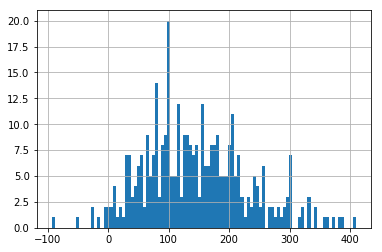

In [50]:
materials_df["Boiling point"].hist(bins=100)

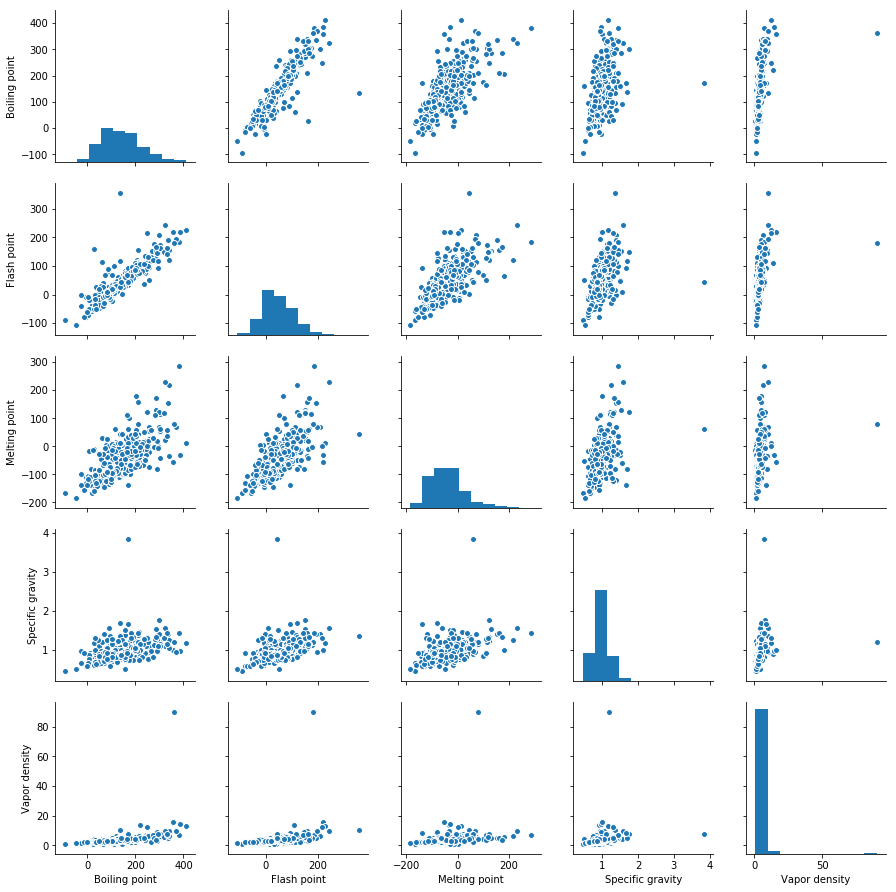

In [51]:
sns.pairplot(materials_df)

TODO: 

find the most similar distribution on http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

choose the most reasonable clustering algorithm and apply it